In [79]:
import pandas as pd
import numpy as np

In [80]:
dados = pd.read_csv('C:\\Users\\caiof\\OneDrive\\Área de Trabalho\dados\\diabetes.csv')

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\caiof\AppData\Local\Temp\ipykernel_12584\1969276624.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [81]:
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


A base de dados possui apenas 394 linhas e 6 colunas. Essa 6 colunas são: glicemia, pressao_sanguinea, dobra_cutanea_triceps, insulina, imc e diabetes. A classificação do modelo deve ser feita para a coluna de diabetes, apresenta valores de 0 para ausência e 1 para a presença de diabetes, portando essa é a variável alvo e o restante são variáveis explicativas. 

In [82]:
import plotly.express as px

In [83]:
dados1 = dados.copy()
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [84]:
dados['diabetes'] = dados['diabetes'].replace({0: 'Não', 1: 'Sim'})


In [85]:
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,Não
1,40,35,168,43.1,2.288,Sim
2,50,32,88,31.0,0.248,Sim
3,70,45,543,30.5,0.158,Sim
4,60,23,846,30.1,0.398,Sim


In [86]:
px.histogram(dados, x = 'diabetes', text_auto = 'True')

In [87]:
#Pode-se obersevar que a maior parte dos individuos que estão nesse banco de dados
#não tem diabete

In [88]:
px.box(dados, x = 'glicemia', color = 'diabetes')

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [89]:
#Podemos observar que os individuos que tem diabetes tem uma média de glicemia
#maior no sangue, temos alguns outliers.

In [90]:
px.box(dados, x = 'pressao_sanguinea', color = 'diabetes')

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [91]:
#Podemos observar que os individuos que tem diabetes tem uma média de pressao sanguínea
#maior.

In [92]:
px.box(dados, x = 'dobra_cutane_triceps', color = 'diabetes')

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [93]:
px.box(dados, x = 'insulina', color = 'diabetes')

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [94]:
#Temos bastantes outliers para os individuos diabéticos. Podemos observar que a
#média de insulina é maior nos diabéticos.

In [95]:
px.box(dados, x = 'imc', color = 'diabetes')

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [96]:
#Média de imc dos diabétivos é maior.

In [97]:
#Ao analisar a amostra de dados de individuos com diabetes, podemos observar pela análise exploratória que os
#individuos que tem diabetes,
#provavelmente tem o nível de glicemia maior no sangue, tem a pressao sanguínea mais
#alta, tem a dobra cutane triceps maior, há um nível de insulina maior no sangue e 
#geralmente tem um peso maior do que um indiviuo que não tem diabetes.



In [98]:
#separando os dados
x = dados1.drop('diabetes', axis = 1)
y = dados1['diabetes']

In [99]:
#Arvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [100]:
modelo = DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x, y)
print(f'{modelo.score(x,y)}')

1.0


In [101]:
#Para realizar a divisão de dados entre treino, validação e teste, podemos utilizar
#o método train_test_split da biblioteca scikit-learn
from sklearn.model_selection import train_test_split

In [102]:
#A primeira divisão será feita dos dados de teste e depois com o restante será feita
#uma nova divisão entre treino e validação, usando o parâmetro stratify = y para manter
#a proporção dos dados da variável alvo entre os conjuntos. Já que a bvase
#de dados possui poucos registros, será dividido apenas 5% dos dados para teste
#para que tenha uma quantidade de registros maior na base de dados de treino


x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.05, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [103]:
#Para criar o modelo será importado dois algoritmos, DecisionTreeClassifier e 
#RandomForestClassifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [105]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier( max_depth = 2)

In [106]:
#Ajustando o modelo de arvore
arvore.fit(x_treino, y_treino)
print(f'A acurácio de treino: {arvore.score(x_treino, y_treino)}')
print(f'A acurácio de teste: {arvore.score(x_val, y_val)}')

A acurácio de treino: 0.7571428571428571
A acurácio de teste: 0.776595744680851


In [107]:
#Ajustando o modelo de random_forest
random_forest.fit(x_treino, y_treino)
print(f'A acurácio de treino: {random_forest.score(x_treino, y_treino)}')
print(f'A acurácio de teste: {random_forest.score(x_val, y_val)}')

A acurácio de treino: 0.7321428571428571
A acurácio de teste: 0.7021276595744681


In [108]:
#Criando a matriz de confusao

from sklearn.metrics import confusion_matrix

In [109]:
previsao_arvore = arvore.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_arvore)
print(matriz_confusao)

[[52 11]
 [10 21]]


In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

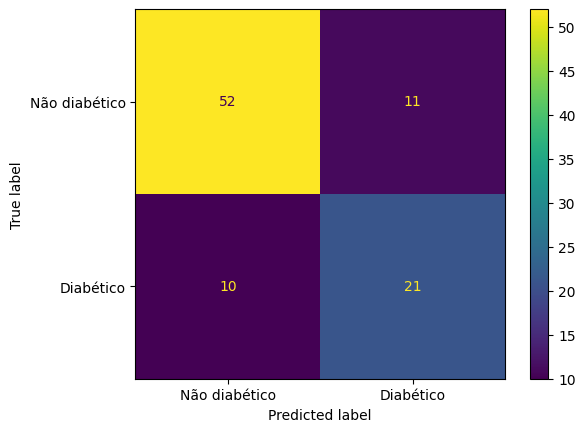

In [111]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                                      display_labels = ['Não diabético', 'Diabético'])
visualizacao.plot();

In [112]:
previsao_forest= random_forest.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_forest)
print(matriz_confusao)

[[59  4]
 [24  7]]


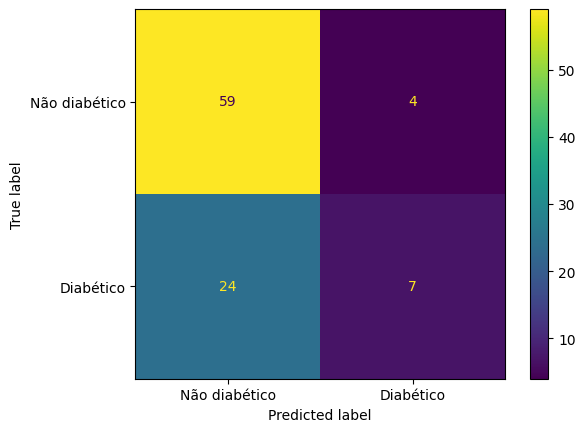

In [113]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                                      display_labels = ['Não diabético', 'Diabético'])
visualizacao.plot();

In [114]:
#O modelo que escolheria para classificar seria o random_forest pois tem
#a acurácia maior, e olhando para a matriz de confusão podemos observar
#que há menos erros nas previsões.

In [115]:
#Verificando as taxas de acerto do modelo

In [116]:
from sklearn.metrics import precision_score, recall_score

In [117]:
print(f'Precisão: {precision_score(y_val, previsao_arvore)}')
print(f'Recall: {recall_score(y_val, previsao_arvore)}')
print(f'Precisão: {precision_score(y_val, previsao_forest)}')
print(f'Recall: {recall_score(y_val, previsao_forest)}')

Precisão: 0.65625
Recall: 0.6774193548387096
Precisão: 0.6363636363636364
Recall: 0.22580645161290322


In [118]:
#o modelo de arvore tem a precisão e o recall maior

In [119]:
from sklearn.metrics import f1_score

In [120]:
print(f'F1_score: {f1_score(y_val, previsao_arvore)}')
print(f'F1_score: {f1_score(y_val, previsao_forest)}')

F1_score: 0.6666666666666666
F1_score: 0.3333333333333333


In [121]:
#Curva ROC
#Verificando quais dos dois modelos está conseguindo diferenciar uma classe da outra

In [122]:
from sklearn.metrics import RocCurveDisplay

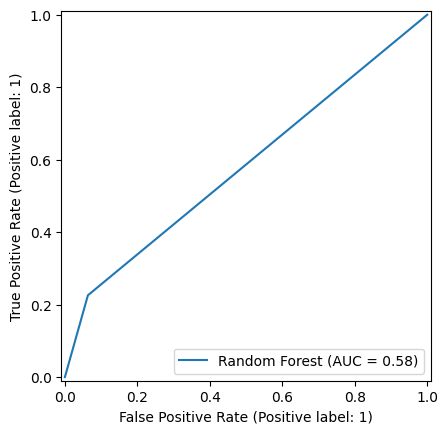

In [123]:
RocCurveDisplay.from_predictions(y_val, previsao_forest, name = 'Random Forest')



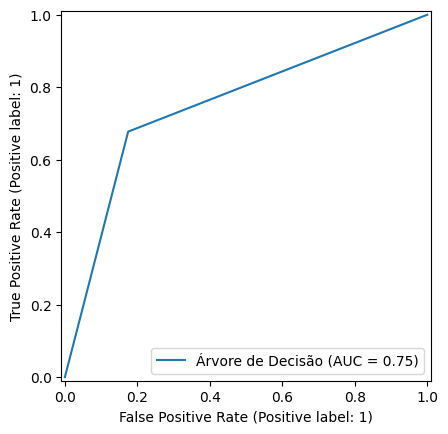

In [124]:
RocCurveDisplay.from_predictions(y_val, previsao_arvore, name = 'Árvore de Decisão')

In [125]:
#AUC = 0.75, quanto mais próximo de 1 melhor

In [126]:
#Verificando a curva de precisão x recall

In [127]:
from sklearn.metrics import PrecisionRecallDisplay

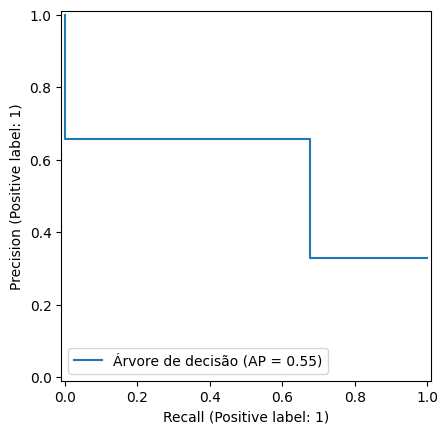

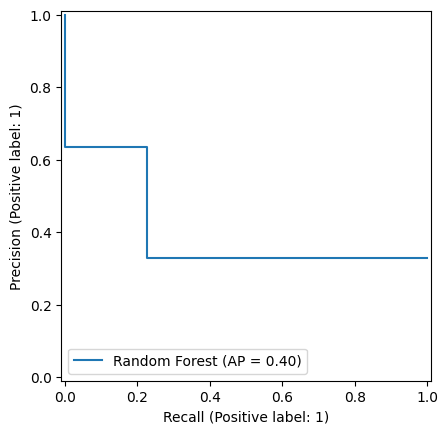

In [128]:
PrecisionRecallDisplay.from_predictions(y_val, previsao_arvore, name = 'Árvore de decisão')
PrecisionRecallDisplay.from_predictions(y_val, previsao_forest, name = 'Random Forest');

In [129]:
#Verificando a precisão média dos modelos
#Quanto mais próximo de 1 é essa medida, melhor é o modelo.
from sklearn.metrics import average_precision_score

In [130]:
print(f'AP: {average_precision_score(y_val, previsao_arvore)}')
print(f'AP: {average_precision_score(y_val, previsao_forest)}')

AP: 0.5509394303363074
AP: 0.3990141635989268


In [131]:
#Gerando todas as medidas de uma vez


In [132]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(y_val, previsao_arvore))
print(classification_report(y_val, previsao_forest))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        63
           1       0.64      0.23      0.33        31

    accuracy                           0.70        94
   macro avg       0.67      0.58      0.57        94
weighted avg       0.69      0.70      0.65        94



In [134]:
#Estratégia de validação cruzada

In [135]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [136]:
from sklearn.model_selection import cross_val_score, KFold


In [137]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confiança (Random Forest): [0.6023578272809171, 0.7662054728613303]


In [138]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [139]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.271659875902482, 0.7462406274736961]
Intervalo de confiança (Random Forest): [0.057726773093917716, 0.6224236028459319]


In [140]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


In [141]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}') 

Acurácia média (Decision Tree): 0.7085561497326203
Acurácia média (Random Forest):0.6898395721925134


In [142]:
#Verificando a proporção dos dados do individuos que tem diabetes

In [143]:
dados['diabetes'].value_counts(normalize = True)

diabetes
Não    0.670051
Sim    0.329949
Name: proportion, dtype: float64

In [144]:
#Existe uma diferença na proporção dos individuos

In [146]:
from imblearn.over_sampling import SMOTE


In [147]:
oversample = SMOTE()
x_bal, y_bal = oversample.fit_resample(x, y)

In [148]:
y_bal.value_counts(normalize = True)

diabetes
1    0.5
0    0.5
Name: proportion, dtype: float64

In [149]:
from imblearn.pipeline import Pipeline as imbPipeline

In [150]:
dados['diabetes'].value_counts(normalize = True)


diabetes
Não    0.670051
Sim    0.329949
Name: proportion, dtype: float64

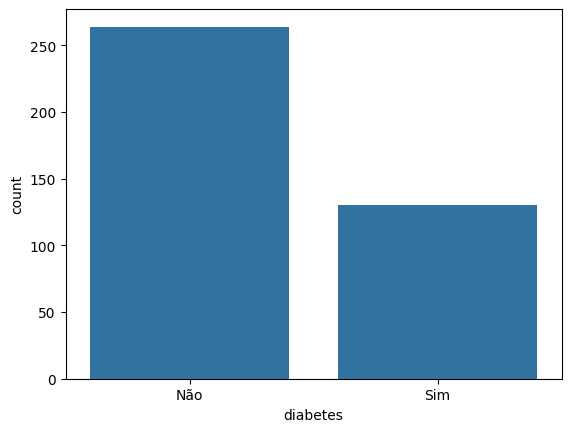

In [151]:
import seaborn as sns 

sns.countplot(dados, x = 'diabetes');


In [152]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE


In [153]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.5525451331978397


In [154]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}') 


F1 (Random Forest):0.5979582567276497


In [155]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss


In [156]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}') 


F1 (Decision Tree):0.5449681473471796


In [157]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')


F1 (Random Forest):0.6114783056940718


              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



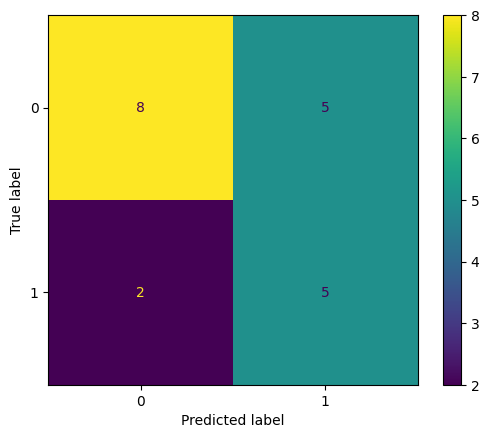

In [158]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);
   